In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
def computeLoss(X1,X2,X3,Y):
    loss=0
    n=len(X1)
    for i in range(n):
        loss+=((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])**2/n/2
    return loss

In [5]:

def computeGrad(X1,X2,X3,Y,i,doer):
    togtmol=2*((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])
    grad=0
    if(doer=="a"):
        grad=togtmol*X1[i]*r
    if(doer=="b"):
        grad=togtmol*X2[i]*r
    if(doer=="c"):
        grad=togtmol*X3[i]*r
    if(doer=="d"):
        grad=togtmol*r
    if(doer=="r"):
        grad=togtmol*(a*X1[i]+b*X2[i]+c*X3[i]+d)
    if(doer=="e"):
        grad=togtmol*X1[i]*j
    if(doer=="f"):
        grad=togtmol*X2[i]*j
    if(doer=="g"):
        grad=togtmol*X3[i]*j
    if(doer=="h"):
        grad=togtmol*j
    if(doer=="j"):
        grad=togtmol*(e*X1[i]+f*X2[i]+g*X3[i]+h)
    if(doer=="k"):
        grad=togtmol
    
    return grad

In [6]:
epoch=1000
learning_rate=0.0000001

In [7]:
a= np.random.random_sample()
b= np.random.random_sample()
c= np.random.random_sample()
d= np.random.random_sample()
e= np.random.random_sample()
f= np.random.random_sample()
g= np.random.random_sample()
h= np.random.random_sample()
j= np.random.random_sample()
k= np.random.random_sample()
r= np.random.random_sample()

In [17]:
import time

loss=[]
t=[]
for i in range(epoch):
#     print("epoch #", i)
#     print("loss: ",computeLoss(data['GRE Score'],data['University Rating']\
#                                ,data['CGPA'],data['Chance of Admit ']))
    t0 = time.time()
    if i<100:
        loss+=[computeLoss(data['GRE Score'],data['University Rating']\
                               ,data['CGPA'],data['Chance of Admit ']*100)]
    which=i%len(data)
    (eh,dun,su,hariu)=\
    (data['GRE Score'],data['University Rating'],data['CGPA'],data['Chance of Admit ']*100)
    a-=learning_rate* computeGrad(eh,dun,su,hariu,which,"a")
    b-=learning_rate* computeGrad(eh,dun,su,hariu,which,"b")
    c-=learning_rate* computeGrad(eh,dun,su,hariu,which,"c")
    d-=learning_rate* computeGrad(eh,dun,su,hariu,which,"d")
    e-=learning_rate* computeGrad(eh,dun,su,hariu,which,"e")
    f-=learning_rate* computeGrad(eh,dun,su,hariu,which,"f")
    g-=learning_rate* computeGrad(eh,dun,su,hariu,which,"g")
    h-=learning_rate* computeGrad(eh,dun,su,hariu,which,"h")
    r-=learning_rate* computeGrad(eh,dun,su,hariu,which,"r")
    j-=learning_rate* computeGrad(eh,dun,su,hariu,which,"j")
    k-=learning_rate* computeGrad(eh,dun,su,hariu,which,"k")
    if i<100:
        t+=[time.time()-t0]
#     print("a: "+str(a)+" b: "+str(b)+" c: "+str(c)+" d: "+str(d),end=" ")
#     print("e: "+str(e)+" f: "+str(f)+" g: "+str(g)+" h: "+str(h))
#     print(" r: "+str(r), " j: "+str(j), " k: "+str(k))
#     print("--------------------------")


In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Loss-g line plotlov

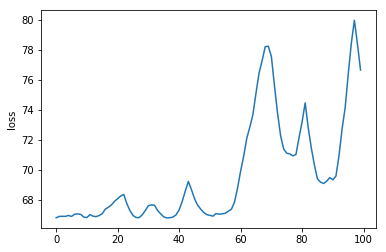

In [19]:
plt.plot(loss)
plt.ylabel('loss')
plt.show()

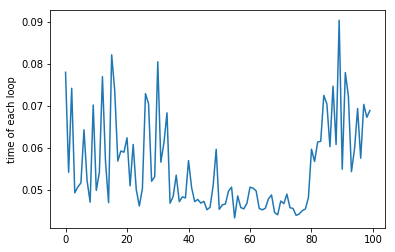

In [20]:
plt.plot(t)
plt.ylabel('time of each loop')
plt.show()

## Undsen hariu

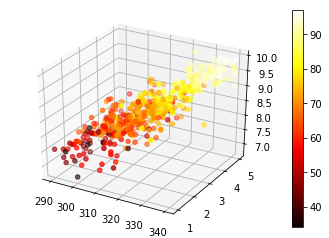

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(eh, dun, su, c=hariu, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [22]:
Y_pred=[]
for i in range(len(eh)):    
    Y_pred+=[(a*eh[i]+b*dun[i]+c*su[i]+d)*r+ (e*eh[i]+f*dun[i]+g*su[i]+h)*j+k]

## Predict hiisen hariug

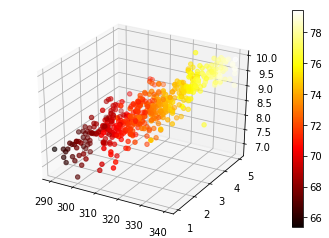

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
img = ax1.scatter(eh, dun, su, c=Y_pred, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## test yourself
    GRE score (max:340, min:260?)
    university_score (0-5)
    CGPA (0-10)

In [24]:
def know_your_chance(GRE,Uni_s, CGPA):
    chance=(a*GRE+b*Uni_s+c*CGPA+d)*r+(e*GRE+f*Uni_s+g*CGPA+h)*j+k
    print("Your chance of getting accepted is: ",int(chance),"%",sep="")
    return

In [25]:
know_your_chance(300,3,8)

Your chance of getting accepted is: 68%
